In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm

In [2]:
# Number of days for Forecasting
forecast_period = 20

In [3]:
data = pd.read_csv('./sales1.csv', parse_dates=['Date'], index_col='Date')
data = data.sort_values(by=['Date'])

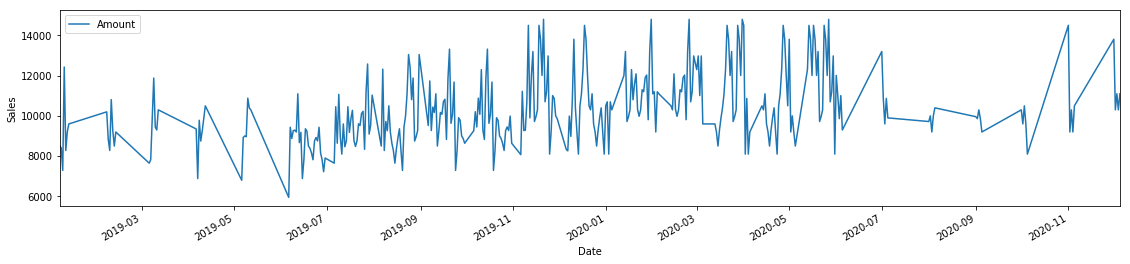

In [4]:
data['Amount'] = data.Amount.replace('[\,]', '', regex=True).astype(float)
actual = data.plot(label='Actual sale', figsize=(19, 4))
actual.set_xlabel('Date')
actual.set_ylabel('Sales')
# plt.legend()
plt.show()

In [5]:
smodel = pm.auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, m=7,start_P=0, seasonal=True,d=1, D=1, trace=True,
                                 error_action='ignore',  
                                 suppress_warnings=True, 
                                 stepwise=True)
print(smodel.summary().tables[1])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6293.760, BIC=6313.148, Fit time=3.877 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=6607.010, BIC=6614.765, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=6489.495, BIC=6505.006, Fit time=0.328 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6314.256, BIC=6329.767, Fit time=2.679 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6293.216, BIC=6316.482, Fit time=3.904 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=6419.221, BIC=6438.609, Fit time=2.669 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6362.826, BIC=6389.970, Fit time=9.202 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=6482.344, BIC=6497.855, Fit time=0.800 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=6376.792, BIC=6407.814, Fit time=5.886 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_o

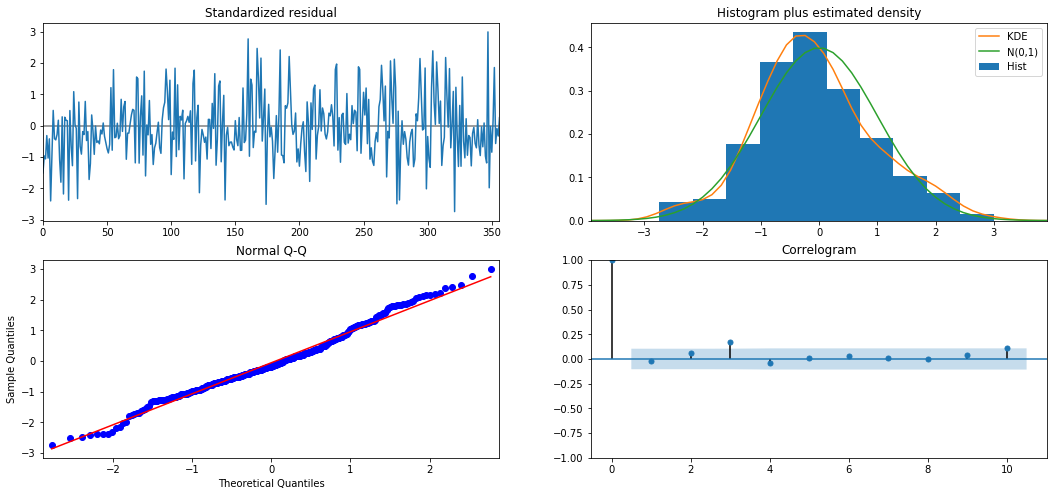

In [6]:
smodel.plot_diagnostics(figsize=(18, 8))
plt.show()

In [7]:
 # Forecast
n_periods = forecast_period
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
fitted = fitted.round(2)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='D')

In [8]:
predicted = pd.DataFrame()
predicted['Date'] = index_of_fc
predicted['Amount'] = fitted
predicted = predicted.set_index('Date')
# predicted

In [9]:
frames = [data, predicted]
result = pd.concat(frames)
# result.index

In [10]:
# result = result.sort_values(by=['Date'])

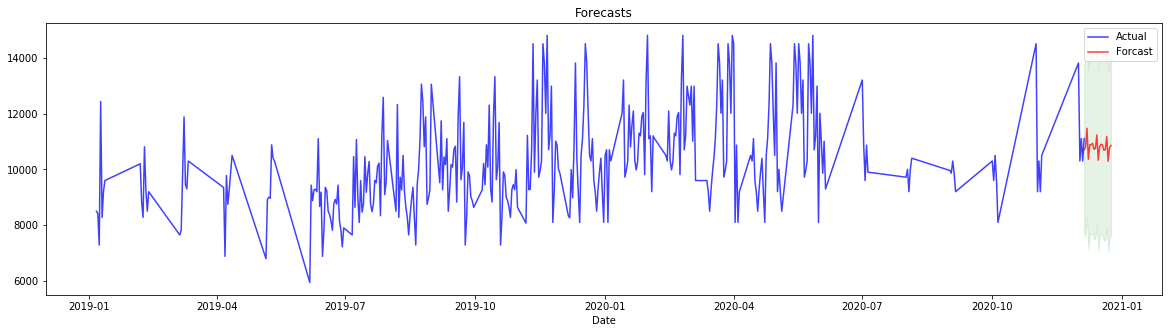

In [11]:
x = np.arange(data.shape[0] + predicted.shape[0])
fig ,ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(result.index[x[:data.shape[0]]], data, alpha=0.75, c='blue', label='Actual')
ax.plot(result.index[x[data.shape[0]:]], predicted, alpha=0.75, c='red',  label='Forcast')  # Forecasts
# ax.set_label('Actual')
ax.fill_between(result.index[x[-predicted.shape[0]:]],
                 confint[:, 0], confint[:, 1],
                 alpha=0.1, color='g')
ax.set_title("Forecasts")
ax.set_xlabel("Date")
ax.legend()
plt.show()